Suppose a single quantum is emitted at the site where the open quantum system is coupled:

In [4]:
import numpy as np
import lightcones.linalg as la
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt

# use latex for plotting
# requires installed latex 
# comment if do not need it 

plt.rcParams['text.usetex'] = True

In [5]:
n_sites = 100
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)
H = la.tridiag(es, hs)

tmax = 800
dt = 0.01
t = np.arange(start = 0, stop = tmax, step = dt)
nt = t.size

phi_0 = np.zeros(n_sites, dtype = complex)
phi_0[0] = 1 # initially quantum is on the site 0

phi_lc = np.zeros((n_sites, nt), dtype = np.cdouble) # Here we store the propagated orbitals

def apply_h(ti, phi_in, phi_out):
    la.mv(H, phi_in, phi_out, cout=1)

def eval_o(ti, phi):
    phi_lc[:, ti] = phi
    
solve(0, nt-1, dt, apply_h, phi_0, eval_o = eval_o)

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation,  PillowWriter

psi_grid = phi_lc[:, ::1000]
x = range(n_sites)
t_ = t[::1000]

def update_fi(frame, line, x):
    line.set_ydata( np.abs(psi_grid[:, frame]))
    return [line]
    
fig, ax = plt.subplots()
ax.set_xlabel("chain site $k$")
ax.set_ylabel("");
y = np.abs(psi_grid[:, 0])**2
    
line, = ax.plot(x, y)

nt_ = len(t_)
    
time = np.arange(0, nt_, 1)

animation = FuncAnimation(
    fig,                
    func=update_fi,    
    frames=time,       
    fargs=(line, x),    
    interval=30,       
    blit=True,         
    repeat=True)       

from IPython.display import HTML
display(HTML(animation.to_jshtml()))
plt.close()

writer = PillowWriter(fps=15, metadata=dict(artist='YourName'), bitrate=1800)
animation.save('your_animation.gif', writer=writer)

Let us plot the wavepacket at the last time moment:

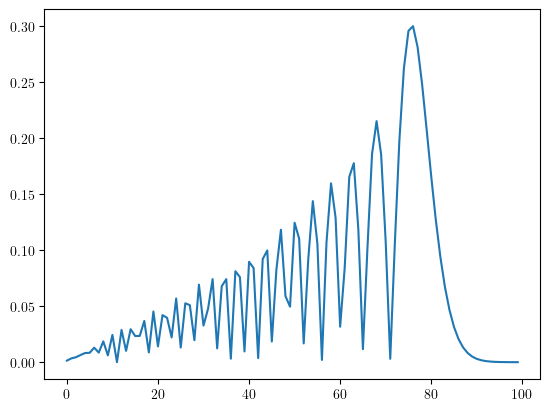

In [7]:
x = range(n_sites)
plt.plot(x, np.abs(phi_lc[:, -1]))

From the plot above we see that the wavepacket has well-defined forward front. The highest peak position $vt$ moves with some constant velocity $v$, and belyond the front it decays in an exponential way, so that the Lieb-Robinson bound is valid:
$\alpha_k\left(t\right) \leq const \times exp\left(vt - k\right)$.
However we see that there is no backward front: the wavepacket decays slowly in an algebaic way. 
This absence of the backward front is the main reason why the real-tim quench problem is difficult

Below we plot $\alpha_0\left(t\right)$ which is the amplitude to observe the quantum on chain site $0$ after $t$ units of time after emission. In other words, this is the amplitude for the quantum to return to the source after $t$ units of time.

(0.0, 200.0)

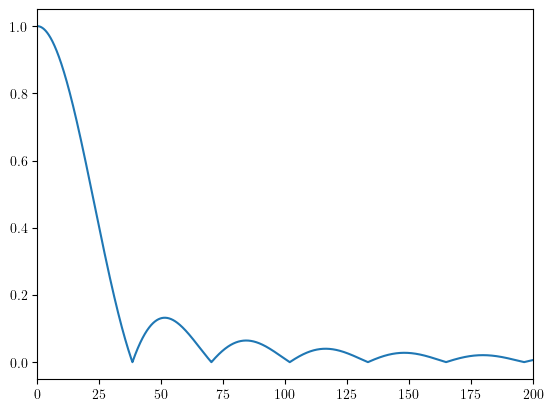

In [8]:
plt.plot(t, np.abs(phi_lc[0, :]))
plt.xlim(0, 200)

We see that the amplitude for the quantum to return is a slowly decaying algebraic function. That is, the emitted quanta decoupled very slowly.